# Data Cleaning
### Tolong baca perintah dan tagar komen dengan saksama :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scaling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Scaling utk Standard Scaller
from sklearn.preprocessing import StandardScaler

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [2]:
# untuk plot Q-Q
import scipy.stats as stats

In [3]:
df_california = pd.read_csv('california_dataset.csv')
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu
train_cal, test_cal = train_test_split(df_california, test_size=0.2, random_state=42)

#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [5]:
test_cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000,4128.000000
mean,3.830338,28.764293,5.404059,1.096637,1421.571705,2.965431,35.58671,-119.51936,2.055003
std,1.881515,12.518304,2.794717,0.610196,1114.023136,1.753316,2.13276,1.99447,1.144870
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.54000,-124.19000,0.149990
25%,2.548500,18.000000,4.396633,1.004338,781.000000,2.435365,33.93000,-121.69000,1.192750
50%,3.500000,29.000000,5.192764,1.046715,1160.000000,2.823586,34.23000,-118.47000,1.786500
75%,4.645925,37.000000,6.008889,1.095908,1722.000000,3.289374,37.70000,-117.99000,2.630000
max,15.000100,52.000000,132.533333,34.066667,16122.000000,83.171429,41.81000,-114.58000,5.000010


In [6]:
df_california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [7]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# IQR Handling
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier
    # Rumus IQR: Q3-Q1
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    #LB: Q0 = Q1 - 3/2*IQR, UB: Q4 = Q3 + 3/2*IQR
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
3. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

### untuk tujuan machine learning

MedInc


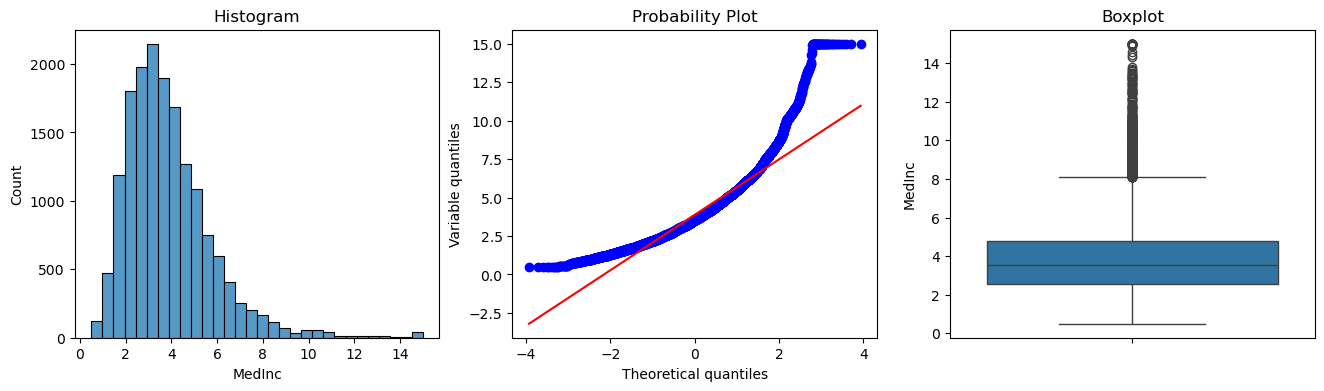

HouseAge


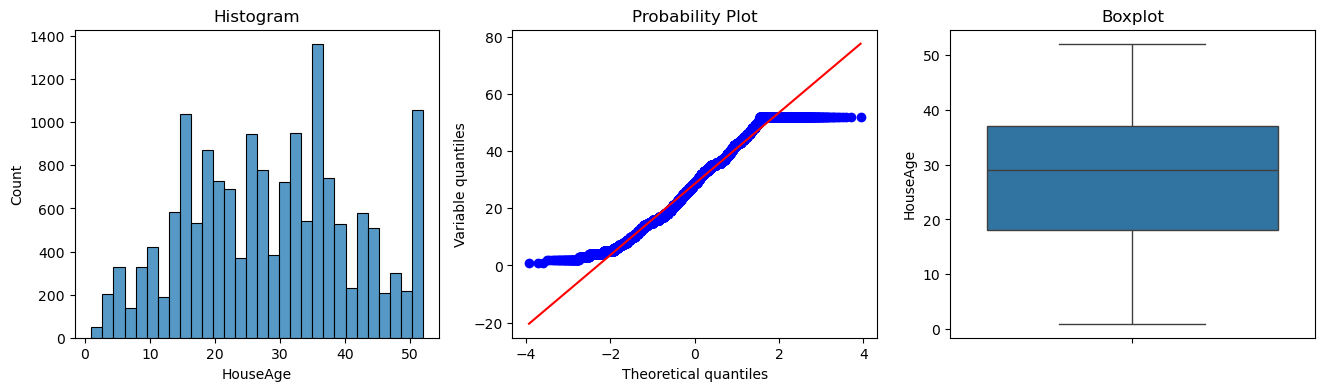

AveRooms


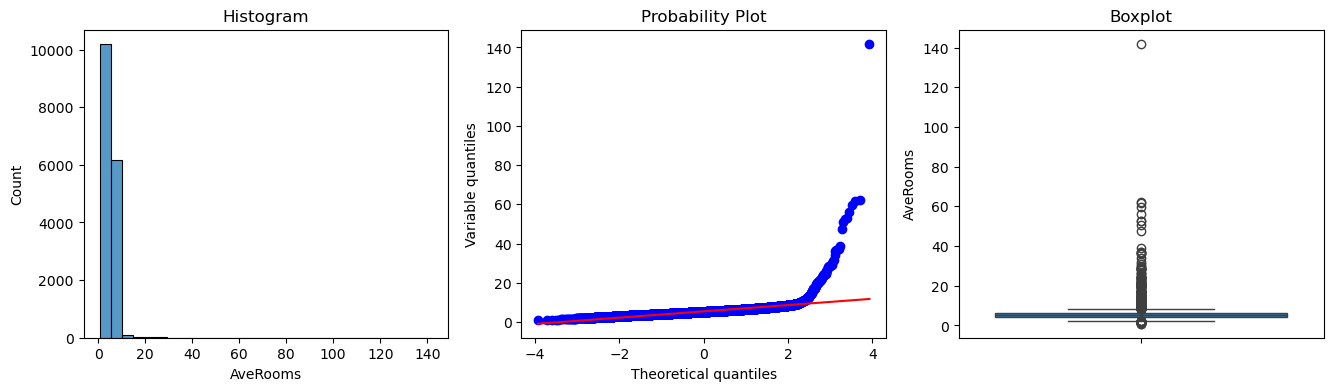

AveBedrms


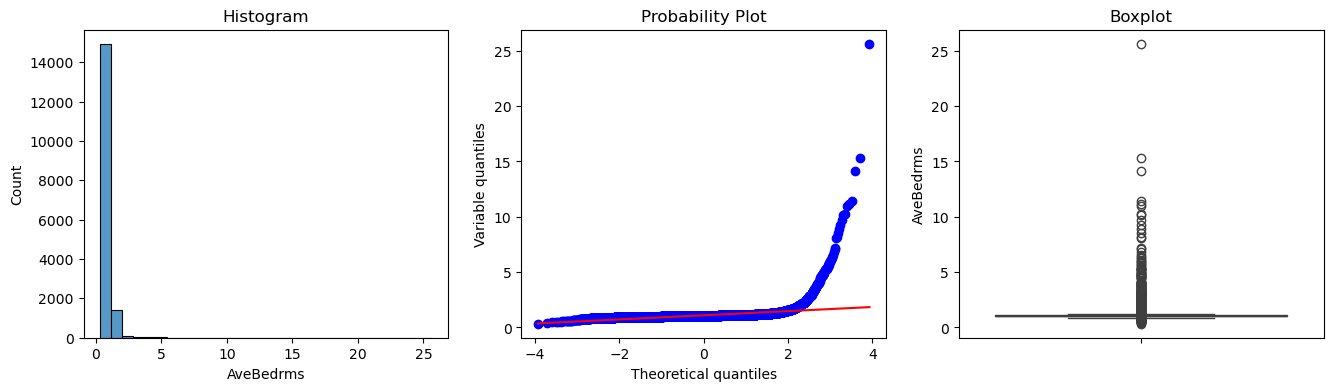

AveOccup


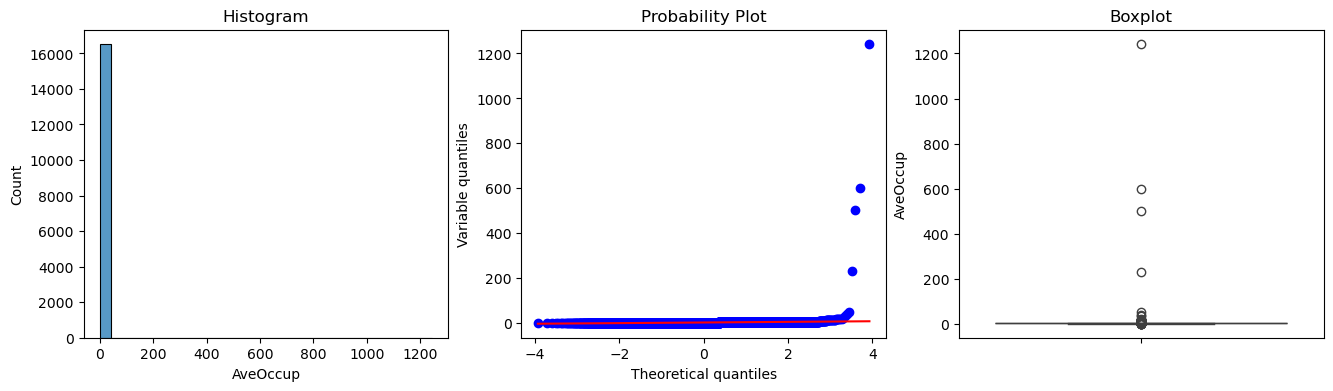

In [8]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek
columnlists = ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup']
for col in columnlists:
    print(col)
    check_plot(train_cal, col)

In [9]:
# loop the ones needed looping - upper and lower limit
filtered_columns_ML = []

for col in columnlists:
    upper_limit, lower_limit = find_outlier_boundary(train_cal, col)

    # Check if there are values outside the boundary
    is_outlier = (train_cal[col] > upper_limit) | (train_cal[col] < lower_limit)
    
    if is_outlier.any():
        print(f"Column: {col} | Outliers detected | Upper: {upper_limit}, Lower: {lower_limit}")
        train_cal = train_cal[~is_outlier]
        filtered_columns_ML.append(col)
    else:
        print(f"Column: {col} | No outliers detected. Skipping filtering.")

print("\nColumns that required filtering due to outliers:")
print(filtered_columns_ML)


Column: MedInc | Outliers detected | Upper: 8.0828875, Lower: -0.7430125000000003
Column: HouseAge | No outliers detected. Skipping filtering.
Column: AveRooms | Outliers detected | Upper: 8.287901344903682, Lower: 2.105155570151675
Column: AveBedrms | Outliers detected | Upper: 1.234177889380486, Lower: 0.8698661193252063
Column: AveOccup | Outliers detected | Upper: 4.594259174661185, Lower: 1.1509821836455003

Columns that required filtering due to outliers:
['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']


### untuk exploratory data analysis

### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali
3. untuk tujuan machine learning dan juga exploratory data analysis.

In [10]:
data_cal = df_california.copy()

MedInc


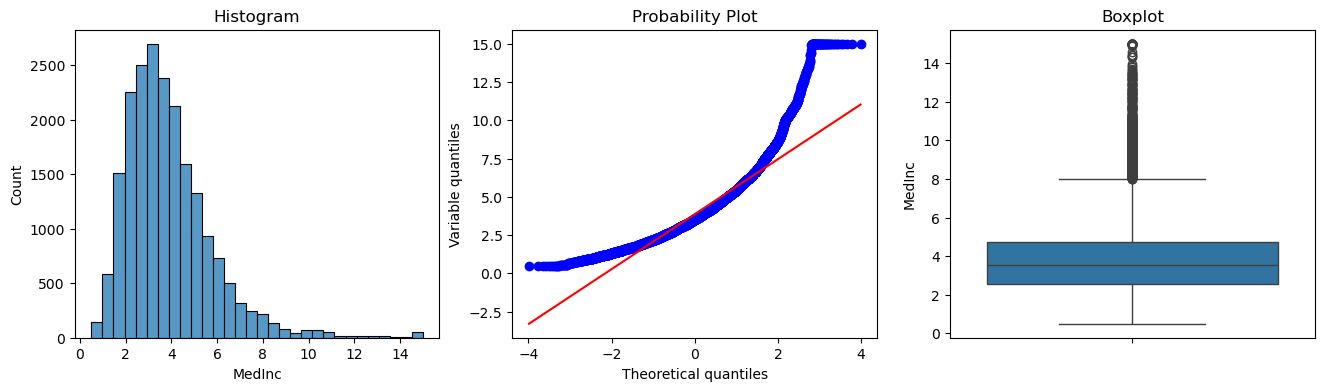

HouseAge


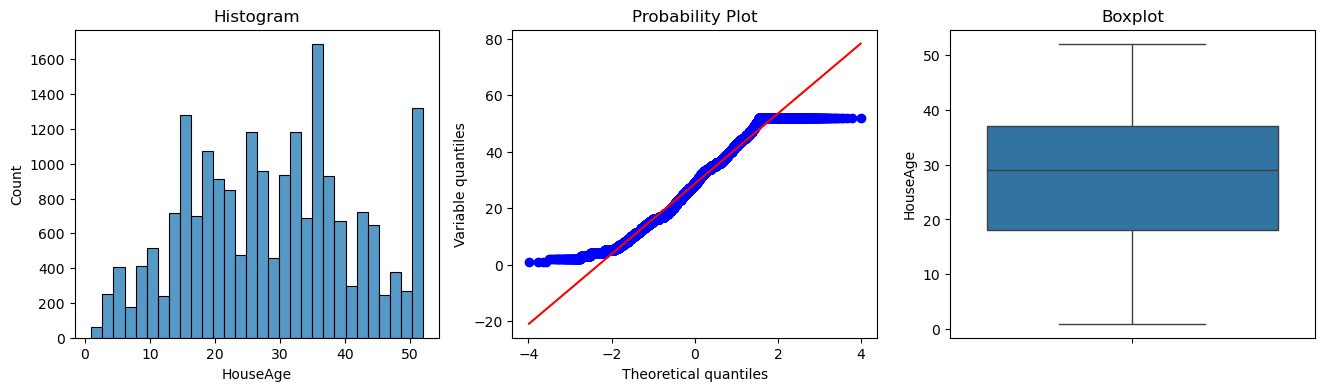

AveRooms


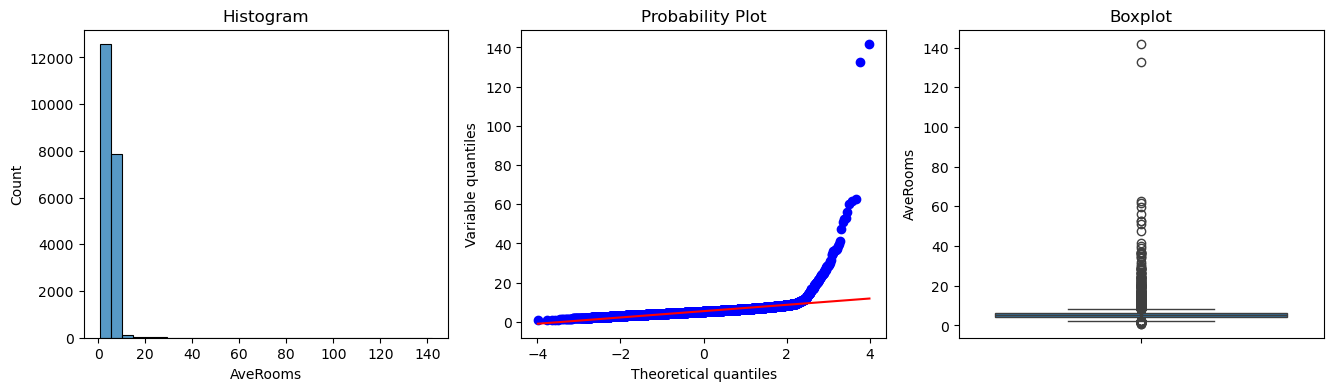

AveBedrms


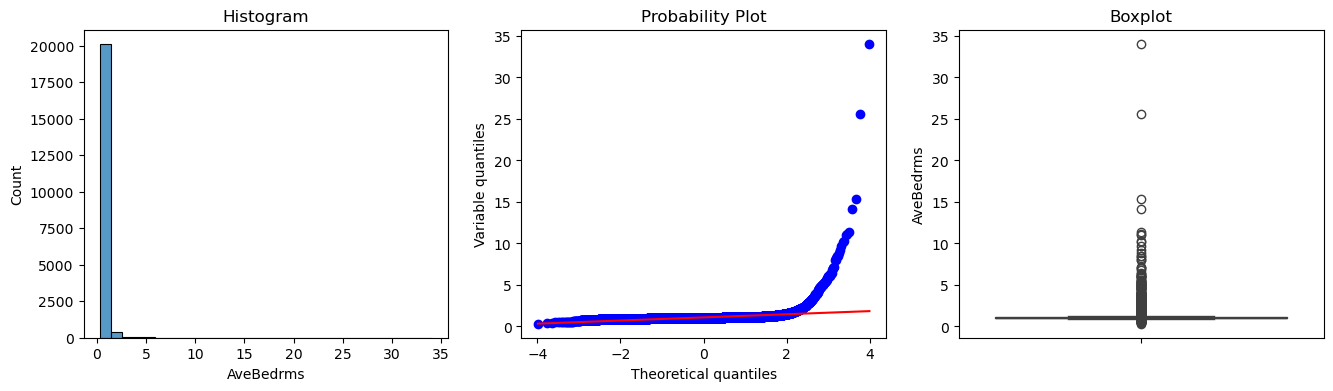

AveOccup


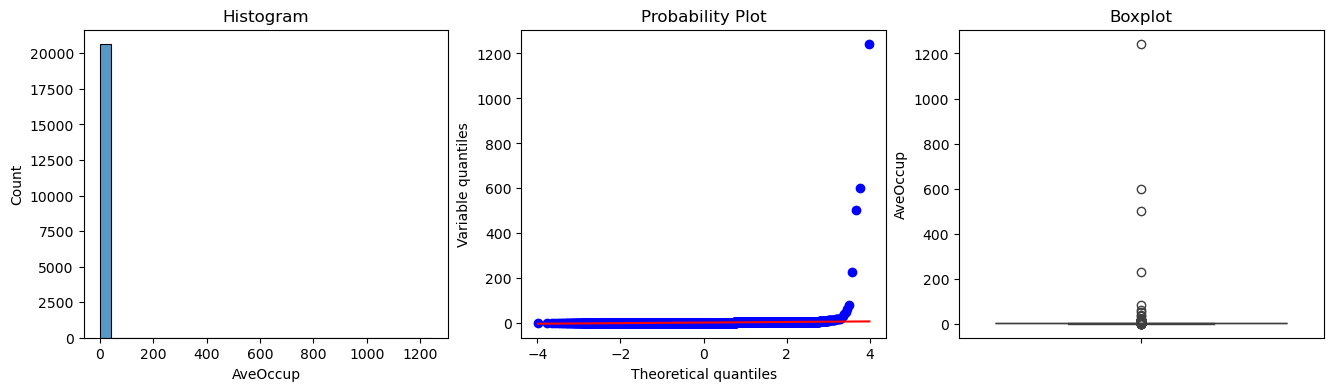

In [11]:
### untuk tujuan machine learning### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali
columnlists = ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup']
for col in columnlists:
    print(col)
    check_plot(data_cal, col)

In [12]:
# loop the ones needed looping - upper and lower limit
filtered_columns_EDA = []

for col in columnlists:
    upper_limit, lower_limit = find_outlier_boundary(data_cal, col)

    # Check if there are values outside the boundary
    is_outlier = (data_cal[col] > upper_limit) | (data_cal[col] < lower_limit)
    
    if is_outlier.any():
        print(f"Column: {col} | Outliers detected | Upper: {upper_limit}, Lower: {lower_limit}")
        data_cal = data_cal[~is_outlier]
        filtered_columns_EDA.append(col)
    else:
        print(f"Column: {col} | No outliers detected. Skipping filtering.")

print("\nColumns that required filtering due to outliers:")
print(filtered_columns_EDA)


Column: MedInc | Outliers detected | Upper: 8.013024999999999, Lower: -0.7063750000000004
Column: HouseAge | No outliers detected. Skipping filtering.
Column: AveRooms | Outliers detected | Upper: 8.278004312800412, Lower: 2.091493533500035
Column: AveBedrms | Outliers detected | Upper: 1.2330069124423961, Lower: 0.8697196620583718
Column: AveOccup | Outliers detected | Upper: 4.596609722329425, Lower: 1.1504742322837904

Columns that required filtering due to outliers:
['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']


### cek ulang distribusi tiap kolom untuk tujuan machine learning

MedInc


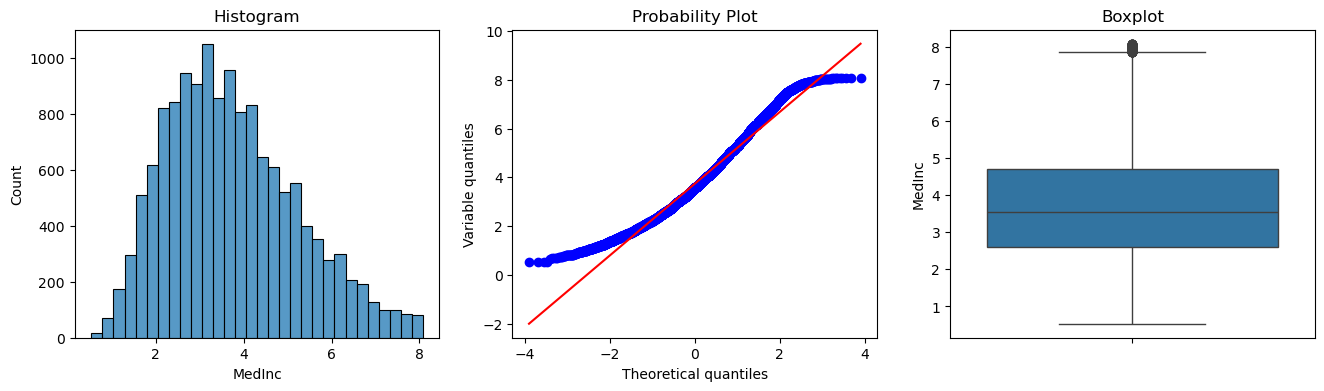

AveRooms


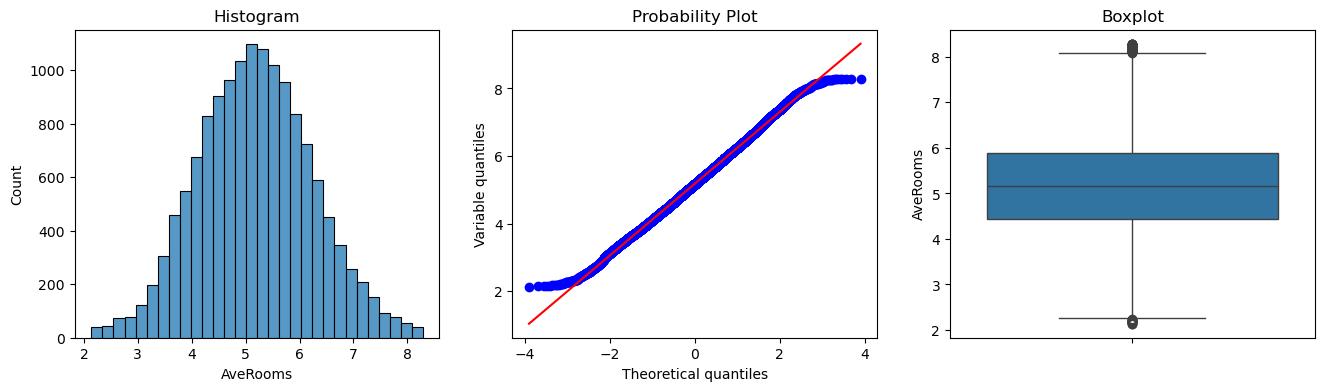

AveBedrms


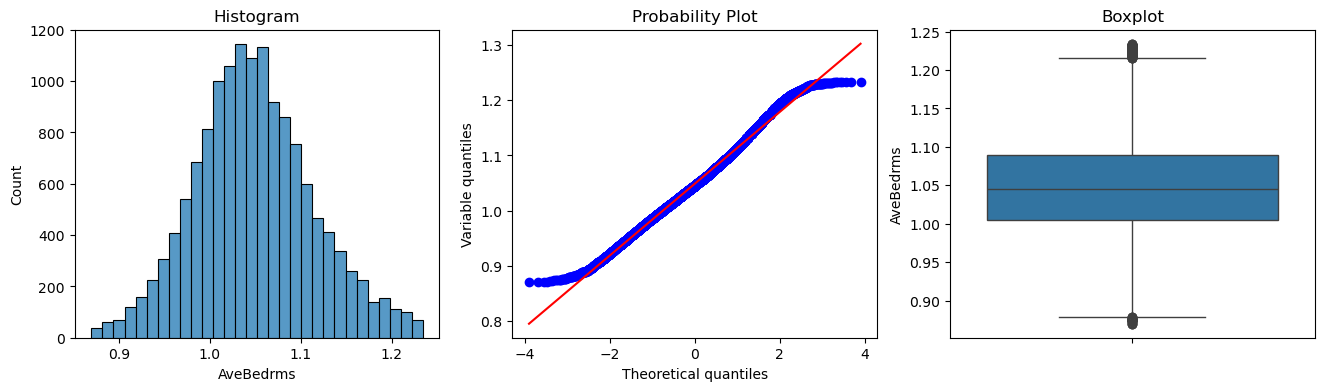

AveOccup


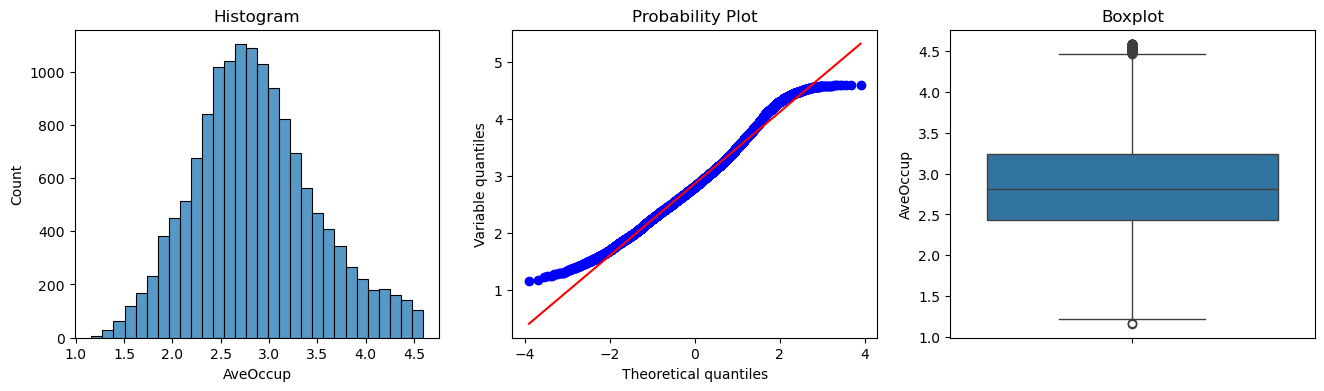

In [13]:
# Melakukan loop untuk mengecek distribusi tiap kolom
for col in filtered_columns_ML:
    print(col)
    check_plot(train_cal, col)

### cek ulang distribusi tiap kolom untuk exploratory data analysis

MedInc


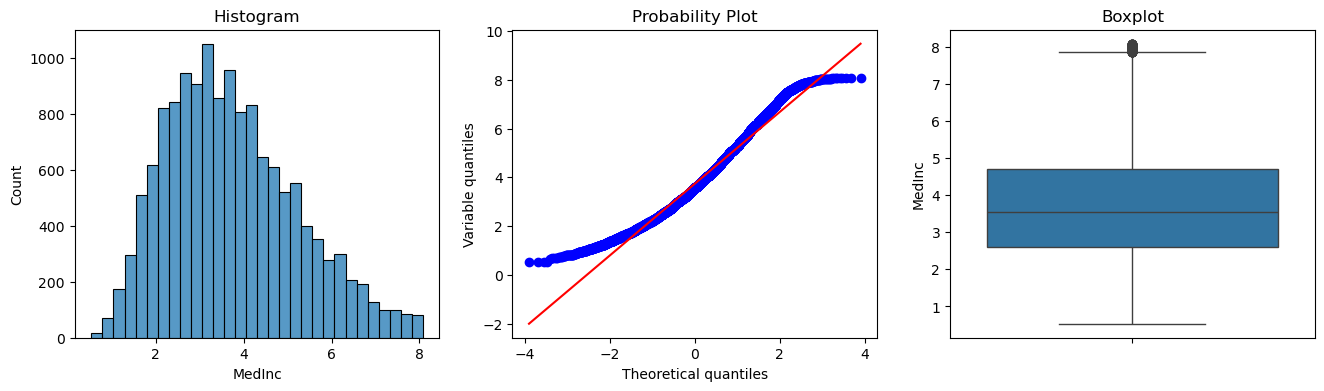

AveRooms


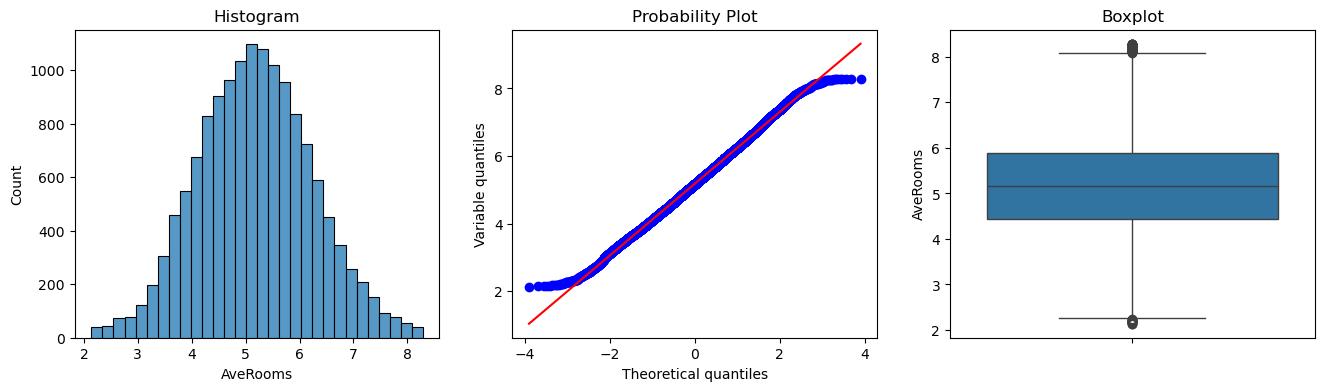

AveBedrms


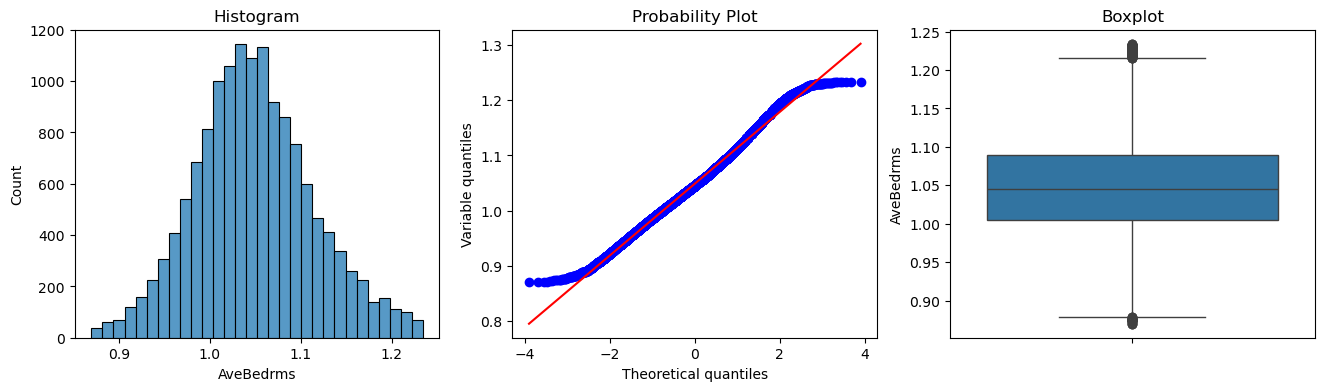

AveOccup


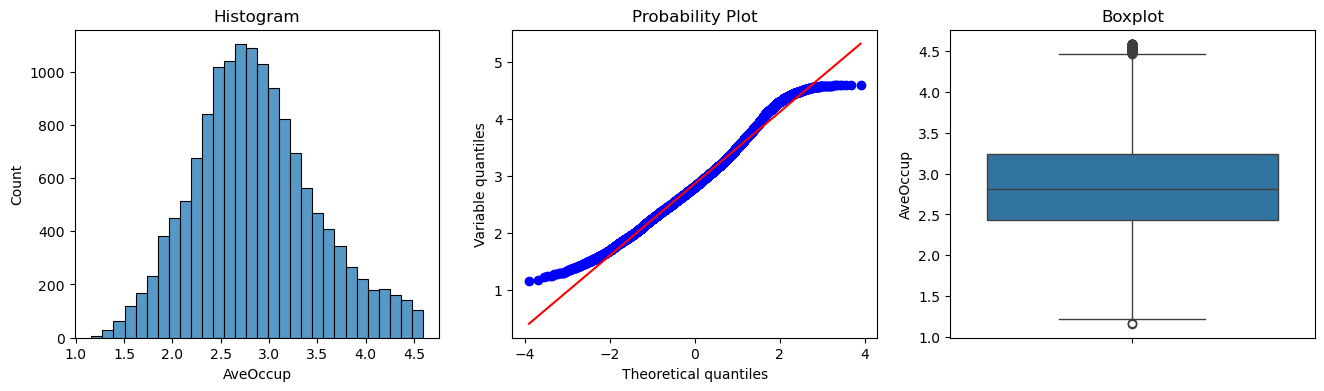

In [14]:
for col in filtered_columns_EDA:
    print(col)
    check_plot(train_cal, col)

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [15]:
df_company = pd.read_csv('company.csv')
df_company.sample(5)

,Revenue,Size,Rating,Headquarters
434,$2 to $5 billion (USD),10000+ employees,3.1,"Omaha, NE"
459,-1,-1,-1.0,-1
450,$100 to $500 million (USD),1001 to 5000 employees,3.2,"Somerset, NJ"
549,$100 to $500 million (USD),201 to 500 employees,3.3,"Emeryville, CA"
420,$2 to $5 billion (USD),10000+ employees,3.5,"Menlo Park, CA"


### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [16]:
df_company.isna().sum()

Revenue          0
Size             0
Rating          50
Headquarters     0
dtype: int64

In [17]:
df_company[df_company.isna().any(axis=1)]

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,NaN,"New York, NY"
7,$1 to $2 billion (USD),1001 to 5000 employees,NaN,"Bedford, MA"
82,$25 to $50 million (USD),51 to 200 employees,NaN,"Minneapolis, MN"
84,$25 to $50 million (USD),51 to 200 employees,NaN,"Austin, TX"
92,$1 to $2 billion (USD),5001 to 10000 employees,NaN,"Herndon, VA"
108,Unknown / Non-Applicable,10000+ employees,NaN,"Palo Alto, CA"
116,$5 to $10 million (USD),51 to 200 employees,NaN,"Annapolis Junction, MD"
129,$2 to $5 billion (USD),5001 to 10000 employees,NaN,"Sunnyvale, CA"
134,Unknown / Non-Applicable,51 to 200 employees,NaN,"San Francisco, CA"
136,$50 to $100 million (USD),201 to 500 employees,NaN,"Lehi, UT"


## Assignment 2. Missing Value Handling :
1. Cek persentase missing value hanya pada kolom Headquarters di company.csv, Cek jenis missing valuenya apakah ada atau tidak ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

In [18]:
df_company.columns # check column

Index(['Revenue', 'Size', 'Rating', 'Headquarters'], dtype='object')

In [19]:
df_company.info() # check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        622 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [20]:
df_company['Headquarters'].value_counts() #check value counts

Headquarters
New York, NY                 33
San Francisco, CA            31
-1                           31
Chicago, IL                  23
Boston, MA                   19
Reston, VA                   14
Mc Lean, VA                  13
Westminster, CO              12
Cambridge, MA                10
Cambridge, United Kingdom    10
Vienna, VA                    8
Herndon, VA                   7
Washington, DC                7
Saint Louis, MO               7
Denver, CO                    7
Arlington, VA                 7
Bedford, MA                   7
Woodbine, MD                  7
San Jose, CA                  7
San Rafael, CA                6
Basel, Switzerland            6
Chantilly, VA                 6
San Antonio, TX               6
Mountain View, CA             6
Princeton, NJ                 5
Fairfax, VA                   5
Bellevue, WA                  5
Rockville, MD                 5
Bethesda, MD                  5
Springfield, MA               5
Los Angeles, CA            

In [21]:
# number of -1 is 31
missval_percentage = 31/df_company.shape[0]*100
missval_percentage

4.613095238095238

In [22]:
# Hitung persentase nilai -1 di kolom Headquarters
100 * len(df_company[df_company['Headquarters'].isin(['-1','Unknown'])]) / len(df_company)

4.613095238095238

In [23]:
100 * len(df_company[df_company['Headquarters'].isin(['-1','Unknown / Non-Applicable'])]) / len(df_company)

4.613095238095238

_I have confirmed 3 times that the percentage is 4.61% for Headquarters unknown values_ Below we see that revenue column can be dropped, definitely as 35% > 20%.

In [24]:
rating_perc = 100 * len(df_company[(df_company['Rating'] == -1) | (df_company['Rating'].isna())]) / len(df_company)
size_perc = 100 * len(df_company[df_company['Size'].isin(['-1','Unknown'])]) / len(df_company)
revenue_perc= 100 * len(df_company[df_company['Revenue'].isin(['-1','Unknown / Non-Applicable'])]) / len(df_company)
print(rating_perc, size_perc, revenue_perc)

13.839285714285714 6.5476190476190474 35.714285714285715


In [25]:
# drop kolom revenue krn missing value > 20 %
df_company = df_company.drop(columns=['Revenue'])
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Size          672 non-null    object 
 1   Rating        622 non-null    float64
 2   Headquarters  672 non-null    object 
dtypes: float64(1), object(2)
memory usage: 15.9+ KB


### untuk tujuan machine learning

In [26]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu
train_company, test_company = train_test_split(df_company, test_size=0.2, random_state=42)
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

In [27]:
#Tulis jawaban missing value handling kolom Headquarters disini
mode_headquarters_train = train_company[(train_company['Headquarters'] != -1) & (~train_company['Headquarters'].isna())]['Headquarters'].mode()[0]
print(mode_headquarters_train)
train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: mode_headquarters_train if x == -1 or pd.isna(x) else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: mode_headquarters_train if x == -1 or pd.isna(x) else x)
print(train_company.isna().sum())
print(test_company.isna().sum())

New York, NY
Size             0
Rating          41
Headquarters     0
dtype: int64
Size            0
Rating          9
Headquarters    0
dtype: int64


In [28]:
#Tulis jawaban missing value handling kolom Headquarters disini
median_rating_train = train_company[(train_company['Rating'] != -1) & (~train_company['Rating'].isna())]['Rating'].median()
train_company['Rating'] = train_company['Rating'].apply(lambda x: median_rating_train if x == -1 or pd.isna(x) else x)
test_company['Rating'] = test_company['Rating'].apply(lambda x: median_rating_train if x == -1 or pd.isna(x) else x)
print(train_company.isna().sum())
print(test_company.isna().sum())

Size            0
Rating          0
Headquarters    0
dtype: int64
Size            0
Rating          0
Headquarters    0
dtype: int64


### untuk exploratory data analysis

In [29]:
# copy for backup
data_company = df_company.copy()

mode_headquarters = data_company[(data_company['Headquarters'] != -1) & (~data_company['Headquarters'].isna())]['Headquarters'].mode()[0]
print(mode_headquarters)
data_company['Headquarters'] = data_company['Headquarters'].apply(lambda x: mode_headquarters if x in ['-1','Unknown'] else x)

median_rating = data_company[(data_company['Rating'] != -1) & (~data_company['Rating'].isna())]['Rating'].median()
print(median_rating)
data_company['Rating'] = data_company['Rating'].apply(lambda x: median_rating if x == -1 or pd.isna(x) else x)

mode_size = data_company[~data_company['Size'].isin(['-1','Unknown'])]['Size'].mode()[0]
print(mode_size)
data_company['Size'] = data_company['Size'].apply(lambda x: mode_size if x in ['-1','Unknown'] else x)

New York, NY
3.8
51 to 200 employees


In [30]:
data_company.isna().sum()

Size            0
Rating          0
Headquarters    0
dtype: int64

#### Tidak ada missing value lagi, dan data tersebut siap untuk digunakan pada Exploratory Data Analysis

# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [31]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')
data_churn = df_churn.copy()
pd.set_option('future.no_silent_downcasting', True)
data_churn['Churn'] = data_churn['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [32]:
custom_cols = df_churn.select_dtypes(include='object').columns.to_list()
custom_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [33]:
for col in custom_cols:
    has_invalid = (
        df_churn[col].isin([-1, 'Unknown']).any() or
        df_churn[col].isna().any()
    )
    if has_invalid:
        print(f"Column: {col}")
        display(df_churn[col].value_counts(dropna=False))

for column in custom_cols:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())

============= customerID =================


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
7398-LXGYX    1
1035-IPQPU    1
7203-OYKCT    1
1699-HPSBG    1
9837-FWLCH    1
9710-NJERN    1
1122-JWTJW    1
4807-IZYOZ    1
1471-GIQKQ    1
0666-UXTJO    1
9053-EJUNL    1
1685-BQULA    1
6691-CCIHA    1
5482-NUPNA    1
3413-BMNZE    1
7310-EGVHZ    1
6827-IEAUQ    1
4929-XIHVW    1
3841-NFECX    1
8773-HHUOZ    1
5248-YGIJN    1
8665-UTDHZ    1
6467-CHFZW    1
6865-JZNKO    1
6322-HRPFA    1
3638-WEABW    1
1066-JKSGK    1
1680-VDCWW    1
8779-QRDMV    1
4183-MYFRB    1
8012-SOUDQ    1
2954-PIBKO    1
7639-LIAYI    1
7760-OYPDY    1
5948-UJZLF    1
3714-NTNFO    1
4080-IIARD    1
4671-VJLCL    1
9867-JCZSP    1
9489-DEDVP    1
8865-TNMNX    1
8168-UQWWF    1
5380-WJKOV    1
6572-ADKRS    1
6047-YHPVI    1
6234-RAAPL    1
8627-ZYGSZ    1
5122-CYFXA    1
5698-BQJOH    1
0557-ASKVU    1
0526-SXDJP    1
1215-FIGMP    1
0434-CSFON    1
5954-BDFSG    1
3957-SQXML    1
5067-XJQFU    1
8769-KKTPH   

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64

============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64

============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64

============= MultipleLines =================


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

============= OnlineSecurity =================


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

============= OnlineBackup =================


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

============= DeviceProtection =================


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

============= TechSupport =================


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

============= StreamingTV =================


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

============= StreamingMovies =================


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

============= TotalCharges =================


TotalCharges
20.2       11
           11
19.75       9
19.65       8
19.9        8
20.05       8
19.55       7
45.3        7
19.45       6
20.25       6
20.15       6
20.45       5
20.3        5
19.4        4
75.3        4
44.4        4
19.3        4
19.85       4
20.5        4
70.6        4
44          4
19.95       4
69.65       4
69.9        4
19.5        4
69.95       4
74.7        4
69.6        4
20.35       4
50.15       4
49.9        4
19.2        4
20.4        4
55.7        3
45.1        3
85.5        3
470.2       3
220.45      3
70.1        3
74.6        3
20.1        3
85          3
19.1        3
79.55       3
305.55      3
383.65      3
75.35       3
20.55       3
2317.1      3
24.8        3
19.25       3
69.55       3
20          3
45.7        3
84.5        3
25.25       3
70.45       3
70.15       3
24.4        3
69.1        3
74.35       3
45.85       3
74.3        3
35.9        3
86.05       3
69.25       3
80.55       3
50.6        3
74.9        3
20.9        3
1284.2 

============= Churn =================


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [34]:
for col in custom_cols:
    has_invalid = (
        data_churn[col].isin([-1, 'Unknown']).any() or
        data_churn[col].isna().any()
    )
    if has_invalid:
        print(f"Column: {col}")
        display(data_churn[col].value_counts(dropna=False))

for column in custom_cols:
    print(f"============= {column} =================")
    display(data_churn[column].value_counts())

============= customerID =================


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
7398-LXGYX    1
1035-IPQPU    1
7203-OYKCT    1
1699-HPSBG    1
9837-FWLCH    1
9710-NJERN    1
1122-JWTJW    1
4807-IZYOZ    1
1471-GIQKQ    1
0666-UXTJO    1
9053-EJUNL    1
1685-BQULA    1
6691-CCIHA    1
5482-NUPNA    1
3413-BMNZE    1
7310-EGVHZ    1
6827-IEAUQ    1
4929-XIHVW    1
3841-NFECX    1
8773-HHUOZ    1
5248-YGIJN    1
8665-UTDHZ    1
6467-CHFZW    1
6865-JZNKO    1
6322-HRPFA    1
3638-WEABW    1
1066-JKSGK    1
1680-VDCWW    1
8779-QRDMV    1
4183-MYFRB    1
8012-SOUDQ    1
2954-PIBKO    1
7639-LIAYI    1
7760-OYPDY    1
5948-UJZLF    1
3714-NTNFO    1
4080-IIARD    1
4671-VJLCL    1
9867-JCZSP    1
9489-DEDVP    1
8865-TNMNX    1
8168-UQWWF    1
5380-WJKOV    1
6572-ADKRS    1
6047-YHPVI    1
6234-RAAPL    1
8627-ZYGSZ    1
5122-CYFXA    1
5698-BQJOH    1
0557-ASKVU    1
0526-SXDJP    1
1215-FIGMP    1
0434-CSFON    1
5954-BDFSG    1
3957-SQXML    1
5067-XJQFU    1
8769-KKTPH   

============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64

============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64

============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64

============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64

============= MultipleLines =================


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

============= OnlineSecurity =================


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

============= OnlineBackup =================


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

============= DeviceProtection =================


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

============= TechSupport =================


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

============= StreamingTV =================


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

============= StreamingMovies =================


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

============= TotalCharges =================


TotalCharges
20.2       11
           11
19.75       9
19.65       8
19.9        8
20.05       8
19.55       7
45.3        7
19.45       6
20.25       6
20.15       6
20.45       5
20.3        5
19.4        4
75.3        4
44.4        4
19.3        4
19.85       4
20.5        4
70.6        4
44          4
19.95       4
69.65       4
69.9        4
19.5        4
69.95       4
74.7        4
69.6        4
20.35       4
50.15       4
49.9        4
19.2        4
20.4        4
55.7        3
45.1        3
85.5        3
470.2       3
220.45      3
70.1        3
74.6        3
20.1        3
85          3
19.1        3
79.55       3
305.55      3
383.65      3
75.35       3
20.55       3
2317.1      3
24.8        3
19.25       3
69.55       3
20          3
45.7        3
84.5        3
25.25       3
70.45       3
70.15       3
24.4        3
69.1        3
74.35       3
45.85       3
74.3        3
35.9        3
86.05       3
69.25       3
80.55       3
50.6        3
74.9        3
20.9        3
1284.2 

============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

In [35]:
#Lakukan normalisasi nilai terlebih dahulu
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

### OHE for ML

In [36]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size=0.2, random_state= 42)

In [37]:
# Melakukan one-hot encoding pada kolom "gender" --> nominal
# Kolom-kolom yang ingin di one-hot encoding
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train_churn = pd.get_dummies(train_churn, columns=encode_ohe)
test_churn = pd.get_dummies(test_churn, columns=encode_ohe)

In [38]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No,True,False
1623,6035-RIIOM,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No,True,False
6074,3797-VTIDR,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes,False,True
1362,2568-BRGYX,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes,False,True
6754,2775-SEFEE,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,False,True


In [39]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes,True,False
2715,0484-JPBRU,0,No,No,41,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,False,True
3825,3620-EHIMZ,0,Yes,Yes,52,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,No,True,False
1807,6910-HADCM,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,True,False
132,8587-XYZSF,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,False,True


### OHE for EDA

In [40]:
# Copy data for backup
data_churn = df_churn.copy()
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
data_churn = pd.get_dummies(data_churn, columns=encode_ohe)
data_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,False,True
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False,True
3,7795-CFOCW,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False,True
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,False


## Assignment 3.a Label Encoder :

0. Lakukan label encoder pada 'Partner', 'Dependents' juga sama seperti yang telah dibahas dikelas, **lalu anda wajib melakukan** :
1. Pilih kolom-kolom yang terindikasi bersifat Data Ordinal.
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.
5. Notes : gunakan Telco-Customer-Churn.csv

**no. 0**

In [41]:
#Tulis jawaban no. 0
from sklearn.preprocessing import LabelEncoder
# ML
columns_to_encode = ['Partner','Dependents']
label_encoder = LabelEncoder()
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [42]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No,True,False
1623,6035-RIIOM,0,0,0,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No,True,False
6074,3797-VTIDR,0,1,0,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes,False,True
1362,2568-BRGYX,0,0,0,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes,False,True
6754,2775-SEFEE,0,0,1,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,False,True


In [43]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,1,0,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes,True,False
2715,0484-JPBRU,0,0,0,41,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,False,True
3825,3620-EHIMZ,0,1,1,52,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,No,True,False
1807,6910-HADCM,0,0,0,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,True,False
132,8587-XYZSF,0,0,0,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,False,True


In [44]:
# EDA
data_churn = df_churn.copy() #--> copying second time
for col in columns_to_encode:
    data_churn[col] = label_encoder.fit_transform(data_churn[col])

In [45]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**no. 1**

In [46]:
# no. 1
for col in custom_cols:
    print(col, ':', df_churn[col].unique(),'\n')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender : ['Female' 'Male'] 

Partner : ['Yes' 'No'] 

Dependents : ['No' 'Yes'] 

PhoneService : ['No' 'Yes'] 

MultipleLines : ['No' 'Yes'] 

InternetService : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : ['No' 'Yes'] 

OnlineBackup : ['Yes' 'No'] 

DeviceProtection : ['No' 'Yes'] 

TechSupport : ['No' 'Yes'] 

StreamingTV : ['No' 'Yes'] 

StreamingMovies : ['No' 'Yes'] 

Contract : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : ['Yes' 'No'] 

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Churn : ['No' 'Yes'] 



In [47]:
df_churn['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [48]:
liz = df_churn.select_dtypes(exclude='object').columns.to_list()
for c in liz:
    print(c, df_churn[c].unique(),'\n')

SeniorCitizen [0 1] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 



#### **Three ordinal variables: tenure, internetservice, contract**
- tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
- internet service: None < DSL < Fiber Optic
- Contract: Month-to-month < one-year < two-year

**no. 2**

In [49]:
#Lakukan normalisasi nilai terlebih dahulu
data_churn['StreamingMovies'] = data_churn['StreamingMovies'].replace({'No internet service': 'No'})
data_churn['StreamingTV'] = data_churn['StreamingTV'].replace({'No internet service': 'No'})
data_churn['TechSupport'] = data_churn['TechSupport'].replace({'No internet service': 'No'})
data_churn['DeviceProtection'] = data_churn['DeviceProtection'].replace({'No internet service': 'No'})
data_churn['OnlineBackup'] = data_churn['OnlineBackup'].replace({'No internet service': 'No'})
data_churn['OnlineSecurity'] = data_churn['OnlineSecurity'].replace({'No internet service': 'No'})
data_churn['MultipleLines'] = data_churn['MultipleLines'].replace({'No phone service': 'No'})

In [50]:
print(data_churn['StreamingMovies'].value_counts()) 
print(data_churn['StreamingTV'].value_counts())
print(data_churn['TechSupport'].value_counts())
print(data_churn['DeviceProtection'].value_counts())
print(data_churn['OnlineBackup'].value_counts())
print(data_churn['OnlineSecurity'].value_counts())
print(data_churn['MultipleLines'].value_counts())

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


**no. 3, 4, 5** (5 is implicit)

In [51]:
# Again, now use 'InternetService', 'Contract', 'tenure'
columns_to_encode = ['InternetService', 'Contract', 'tenure']
label_encoder = LabelEncoder()

### untuk tujuan machine learning

In [52]:
for col in columns_to_encode:
    # ML
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
    test_churn[col] = label_encoder.transform(test_churn[col])

pd.set_option('future.no_silent_downcasting', True)
train_churn['Churn'] = train_churn['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,Yes,No,0,Yes,No,Yes,No,No,Yes,1,No,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,0,0,54,Yes,Yes,1,No,Yes,No,No,Yes,Yes,2,Yes,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,1,0,1,No,No,0,No,No,No,No,No,No,0,Yes,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,0,0,4,Yes,No,1,No,No,No,No,No,No,0,Yes,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,0,1,0,Yes,Yes,0,Yes,Yes,No,Yes,No,No,2,Yes,Bank transfer (automatic),61.90,,0,False,True


In [53]:
train_churn['InternetService'].unique()

array([0, 1, 2])

In [54]:
train_churn['tenure'].unique()

array([21, 54,  1,  4,  0,  7, 32, 72, 19, 10, 45, 40, 47, 36, 69, 71, 35,
        3, 68, 42,  8, 46, 12, 26, 49, 33, 31, 66, 58, 13, 57,  6, 59, 15,
       27, 34, 18,  5, 39, 29,  2, 63, 20, 14, 56, 37, 24, 52, 43, 11, 16,
       50, 38, 23, 55, 48, 53, 70, 22, 28, 44, 65, 64, 60, 51,  9, 25, 61,
       30, 17, 41, 67, 62])

In [55]:
train_churn['Contract'].unique()

array([1, 2, 0])

### untuk exploratory data analysis

In [56]:
for col in columns_to_encode:
    # EDA
    data_churn[col] = label_encoder.fit_transform(data_churn[col])

data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No,0,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,No,0,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,No,0,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,No,1,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes


In [57]:
data_churn['Contract'].unique()

array([0, 1, 2])

In [58]:
data_churn['InternetService'].unique()

array([0, 1, 2])

## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [59]:
# Tulis jawaban
dict_internet = train_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_internet

{0: 0.1918514698298092, 1: 0.41555824264409513, 2: 0.07660626029654036}

Dari hasil dictionary 'dict_internet':
1. No internet memiliki rata-rata tingkat churn 19.19%
2. DSL internet memiliki rata-rata tingkat Churn 41.55%
3. Fiber Optic internet memiliki rata-rata tingkat Churn sebesar 7.66%

### untuk tujuan machine learning

In [60]:
train_churn['InternetService'] = train_churn['InternetService'].map(dict_internet)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_internet)
train_churn['InternetService'].head()

2142    0.191851
1623    0.415558
6074    0.191851
1362    0.415558
6754    0.191851
Name: InternetService, dtype: float64

In [61]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,Yes,No,0.191851,Yes,No,Yes,No,No,Yes,1,No,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,0,0,54,Yes,Yes,0.415558,No,Yes,No,No,Yes,Yes,2,Yes,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,1,0,1,No,No,0.191851,No,No,No,No,No,No,0,Yes,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,0,0,4,Yes,No,0.415558,No,No,No,No,No,No,0,Yes,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,0,1,0,Yes,Yes,0.191851,Yes,Yes,No,Yes,No,No,2,Yes,Bank transfer (automatic),61.90,,0,False,True


In [62]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,1,0,1,No,No,0.191851,No,No,No,No,No,No,0,Yes,Electronic check,24.80,24.8,Yes,True,False
2715,0484-JPBRU,0,0,0,41,Yes,Yes,0.076606,No,No,No,No,No,No,0,Yes,Bank transfer (automatic),25.25,996.45,No,False,True
3825,3620-EHIMZ,0,1,1,52,Yes,No,0.076606,No,No,No,No,No,No,2,No,Mailed check,19.35,1031.7,No,True,False
1807,6910-HADCM,0,0,0,1,Yes,No,0.415558,No,No,Yes,No,No,No,0,No,Electronic check,76.35,76.35,Yes,True,False
132,8587-XYZSF,0,0,0,67,Yes,No,0.191851,No,No,No,Yes,No,No,2,No,Bank transfer (automatic),50.55,3260.1,No,False,True


### untuk exploratory data analysis

In [63]:
data_churn['Churn'] = data_churn['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

In [64]:
EncodeEDAInternetDict = data_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
EncodeEDAInternetDict

{0: 0.1895910780669145, 1: 0.4189276485788114, 2: 0.07404980340760157}

In [65]:
data_churn['InternetService'] = data_churn['InternetService'].map(EncodeEDAInternetDict)

In [66]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No,0.189591,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,No,0.189591,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,Yes,No,0.189591,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,No,0.189591,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,No,0.418928,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


## Thank you :)